# Intuition behind the power spectral density

* [The Fourier transform](#fourier-transform)
* [Relation to autocovariance](#autocovariance)
* [Relation to multiple linear regression](#multiple-linear-regression)

The main text of this chapter discusses the analysis of rhythmic activity. One important component of this analysis is the power spectral density. In this supplement, we examine equations for the Fourier transform (<a href="Analysis%20of%20rhythmic%20activity.ipynb#eq:3.8" class="thumb">eq.<span><img src="imgs/eq3-8.png"></span></a>) and spectrum (<a href="Analysis%20of%20rhythmic%20activity.ipynb#eq:3.9" class="thumb">eq.<span><img src="imgs/eq3-9.png"></span></a>), and the Python code. In doing so, we explore some subtleties of this measure and strengthen our intuition for this measure’s behavior. Building this intuition is perhaps the most important part of dealing with unforeseen circumstances arising in your own data.
<a id="fourier-transform"></a>

<a id="fourier-transform"></a>
##### What is the Fourier transform actually doing?
The Fourier transform represents the data x as a linear combination of sinusoids with different frequencies. To see this, consider again:

$$X_j = \sum_{n=1}^{N}x_n \exp(-2\pi i f_j t_n).$$

What is this expression actually doing? Let's consider this equation piece by piece. The first term,

$$\sum_{n=1}^N$$

represents a sum over the indices of $x_n$. Because each subsequent index represents a step forward in time of $\Delta$, this sum represents a sum over time. In fact, this sum extends from the first index ($n=1$) to the last index ($n = N$) of the data, so the summation occurs over the entire duration of the recording. Adding the second term,

$$\sum_{n=1}^N x_n$$,

the summation now acts on the data $x_n$, so we're summing up the data over all indices or equivalently over the entire time of recording. The third term, 

$$\exp(-2\pi i f_j t_n),$$

consists of an exponential (exp) operating on the product of five individual terms, each of which is a number. The first two numbers are simple: $-2 \pi$. The third number is $i \equiv \sqrt{-1}$, a quantity representing an *imaginary unit*. The utility of the imaginary unit is that we can rewrite the exponential as the sum of a sine and cosine function. Remember from caclulus the remarkable Euler's formula:

$$\exp(-2\pi i f_j t_n) = \cos(-2\pi f_j t_n) + i \sin(-2\pi f_j t_n).$$

Notice that the $i$ now appears multiplying the sine term, and not inside the arguments of either sinusoid. Both sinusoids operate on the product of $2\pi$ and two terms, the frequency $f_j$ and the time $t_n$. Rewriting the equation for the Fourier transform using Euler's formula, we find<a id="eq:3.10"></a>

\begin{equation}\tag{10}\label{eq:10}
X_j = \left(\sum_{n=1}^N x_n \cos(-2\pi f_j t_n) \right) + i\left(\sum_{n=1}^N x_n \sin(-2\pi f_j t_n)\right), 
\end{equation}

where the summation is distributed over both terms.

Written in this way, the Fourier transform becomes easier to interpret. Let’s consider the first term of the equation above. For each index $n$, we multiply the data $x_n$ by a cosine function evaluated at frequency $f_j$ and time $t_n$. We then sum the results of this multiplication over all indices from $n=1$ to $n=N$, or equivalently, from time $t_n = \Delta$ to time $t_n =T$. So, we multiply the data by a cosine function at frequency $f_j$ for each point in time and sum the product over time. The second term of the equation is like the first, except we multiply the data $x_n$ by a sine function.

We therefore think of the Fourier transform as comparing the data $x$ to the sinusoids oscillating at frequency $f_j$. When the data and sinusoid at frequency $f_j$ align the summation in the Fourier transform is large and the result $X_j$ is a large number. When the data and sinusoid at frequency $f_j$ do not align, the summation in the Fourier transform is small and $X_j$ is a tiny number. To make these ideas more concrete, we can consider some simple examples. In these examples, the data $x$ will be a perfect cosine with frequency 10 Hz.

In [4]:
# Prepare the modules and plot settings
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel, ylabel, plot, show, title
%matplotlib inline
rcParams['figure.figsize'] = (12,3)

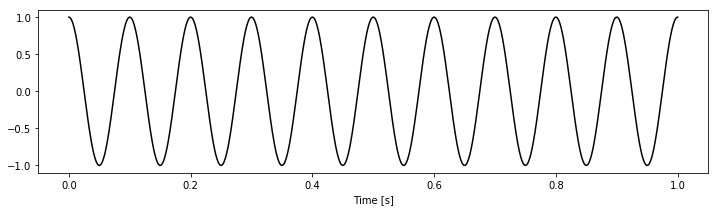

In [5]:
tt = np.linspace(0, 1, 1000)  # Create a time variable (in seconds)
x = np.cos(2 * np.pi * 10 * tt)  # Generate the data, a 10 Hz cosine
plot(tt, x, 'k')  # Plot the result
xlabel('Time [s]')
show()

Choosing $f_j = 4$ Hz, we can construct a sine and cosine function each oscillating at 4 Hz.

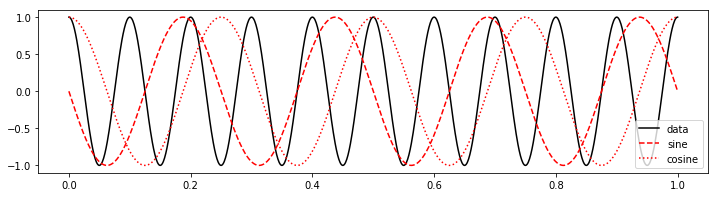

In [6]:
fj = 4  # Set frequency
fj_sin = np.sin(-2 * np.pi * fj * tt)  # construct sine wave
fj_cos = np.cos(-2 * np.pi * fj * tt)  # ... and cosine
plot(tt, x, 'k', label='data')         # Plot the data
plot(tt, fj_sin, 'r--', label='sine')  # ... and the sine
plot(tt, fj_cos, 'r:', label='cosine') # ... and cosine
plt.legend()
show()

Then, to perform the calculation of the equation above (<a href="Analysis%20of%20rhythmic%20activity.ipynb#eq:3.10" class="thumb">eq.<span><img src="imgs/eq3-10.png"></span></a>) we multiply the data $x$ by the sinusoids at each point in time.

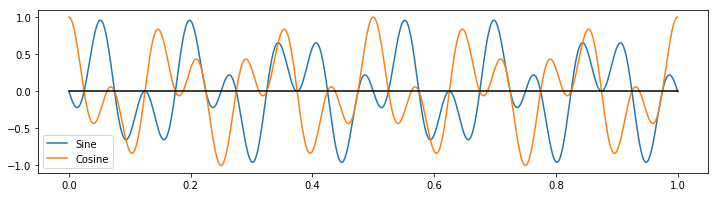

In [7]:
# Plot the product of x with the sinusoids
plot(tt, x * fj_sin, tt, x * fj_cos)
plt.legend(['Sine', 'Cosine'])
plot(tt, np.zeros_like(tt), 'k')  # Show zero
show()

Notice that the products alternate between positive and negative values throughout time. 

<div class="alert alert-block alert-info">
<p>**Q.** In this case, what is the approximate value of $X_j$ when $f_j = 4$ Hz?</p>

<p>**A.** We know that $X_j$ is the summation over time of the product of $x$ and the sinusoids (<a href="#eq:3.10" class="thumb">eq.<span><img src="imgs/eq3-10.png"></span></a>). Above, we plotted these products over time. Because each product alternates between positive and negative values roughly equally over time, the summation of the product over time is approximately zero. We therefore conclude that both the real part (i.e., the cosine term) and the imaginary part (i.e. the sine term) are small and $X_j \approx 0 + 0i$ when $f_j = 4$ Hz. </p>
</div>

In this case, the sinusoids at frequency $f_j = 4$ Hz do not align with the data $x$, and $X_j$ is nearly zero in both its real and imaginary parts. Now consider the case in which we choose $f_j = 10$ Hz. With this choice of $f_j$, the data $x$ and the cosine function align perfectly. 

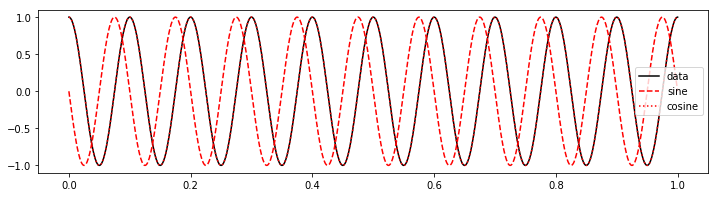

In [8]:
fj = 10  # Set the frequency
fj_sin = np.sin(-2 * np.pi * fj * tt)  # Construct the sine wave
fj_cos = np.cos(-2 * np.pi * fj * tt)  # ... and cosine wave

plot(tt, x, 'k', label='data')  # Plot the data
plot(tt, fj_sin, 'r--', label='sine')  # ... and the sine
plot(tt, fj_cos, 'r:', label='cosine')  # ... and cosine
plt.legend()
show()

<div class="alert alert-block alert-info">
**Q.** Can you predict how the plot of the product of the data with the overlapping cosine function will look? Plot the product and check your prediction.
</div>

The product of the cosine function and the data is always non-negative, and therefore its summation over time results in a large positive number. In this case, the real part of $X_j$ is large because the cosine function with frequency $f_j =10$ Hz and the data $x$ match. In this sense, the Fourier transform reveals the dominant frequencies of the underlying time series.

<div class="alert alert-block alert-info">
**Q.** What is the approximate value of the *imaginary* part of $X_j$ for $f_j = 10$ Hz? *Hint*: Consider the plot of the product of the sine function and the data.
</div>

<a id="autocovariance"></a>
##### Relation of the spectrum to the autocovariance.
We’ve now introduced two tools for assessing dependent structure in the EEG data: the autocovariance and the spectrum. Remarkably, these two measures are related in an important way.

<div class="alert alert-success">
The spectrum is the Fourier transform of the autocovariance.
</div>

The spectrum and autocovariance both assess dependent structure in the data but in different domains - the spectrum in the frequency domain and the autocovariance in the time domain. Notice that the spectrum $S_{xx, j}$ (<a href="Analysis%20of%20rhythmic%20activity.ipynb#eq:3.9" class="thumb">eq.<span><img src="imgs/eq3-9.png"></span></a>) is a function of frequency index $j$, while the autocovariance $r_{xx}[L]$ (<a href="Analysis%20of%20rhythmic%20activity.ipynb#eq:3.3" class="thumb">eq.<span><img src="imgs/eq3-3.png"></span></a>) is a function of time lag $L$. For the EEG data of interest here, the dominant 60 Hz rhythm manifests as periodicity in the autocovariance as a function of lag (<a href="Analysis%20of%20rhythmic%20activity.ipynb#fig:3-4a" class="fig">figure<span><img src="imgs/3-4a.png"></span></a>), and a peak in the spectrum as a function of frequency (<a href="Analysis%20of%20rhythmic%20activity.ipynb#fig:3.6" class="fig">figure<span><img src="imgs/3-6.png"></span></a>). Although the two measures are related through the Fourier transform, each provides a different perspective on the dependent structure in the data. In practice, applying and visualizing both measures is often of use. 

Here’s an associated mathematical nugget. The spectrum is the Fourier transform of $x$ multiplied by its complex conjugate. That produces a real number (i.e., the imaginary part is 0), which is convenient for plotting and visualization. The autocovariance is necessarily symmetric with respect to lag, that is, $r_{xx}[L] = r_{xx}[-L]$. In other words, the autocovariance is an even function. The Fourier transform of an even function is real, so the Fourier transform of the autocovariance is also a real number, consistent with the values of the spectrum.

<a id="multiple-linear-regression"></a>
##### Relation of the Spectrum to Multiple Linear Regression
As a final perspective, we consider a statistical modeling approach, with the goal of characterizing the rhythms that appear in the EEG data. To develop this approach, we first introduce *linear regression*. The idea of linear regression is to express a response variable at time $n$ (call it $x_n$) in terms of predictor variables (call them $z_{1n}, z_{2n},...,z_{pn}$ for $p$ predictor variables) as <a id="eq:3.11"></a>

$$x_n = \beta_0 + \beta_1z_{1n} + \beta_2z_{2n} + ... + \beta_pz_{pn} + \epsilon_n,$$

where $\epsilon_n$ is a random variable. This formulation represents the model we use in *multiple linear regression*. The term multiple comes from the multiple predictors used. The term linear expresses the fact that each predictor appears linearly in the expression. The challenge is to identify the unknown coefficients (the  $\beta$’s) given the observed response and predictor variables. We note that the case of $p = 1$ corresponds to simple linear regression; in that case, the goal is to fit the line,

$$x_n = \beta_0 + \beta_1z_{1n} + \epsilon_N,$$

with slope $\beta_1$ and intercept $\beta_0$.

Let’s consider the application of multiple linear regression to the EEG data with a specific
purpose: to remove the 60 Hz line noise. Recall that we found that the spectrum was dominated by a 60 Hz peak (<a href="Analysis%20of%20rhythmic%20activity.ipynb#fig:3.6" class="fig">figure<span><img src="imgs/3-6.png"></span></a>). We expect this 60 Hz is due to electrical noise in the system, and this large noise peak may mask other interesting features occurring in the EEG data. Therefore, our analysis of the EEG data may benefit by removing this large 60 Hz signal. To do so, we first fit a multiple linear regression model to the data $x_n$ with the following form,<a id="eq:3.12"></a>

$$x_n = \beta_0 + \beta_1 \sin(2\pi 60 t_n) + \beta_2\cos(2\pi 60 t_n) + \epsilon_n,$$

where $x_n$ is the EEG data at index $n$, $t_n$ is the corresponding time axis at index $n$ in units of seconds, and $\epsilon_n$ is a random variable.

<div class="alert alert-block alert-info">
<p>**Q.** The model consists of three predictors. What are they?</p>
<p>**A.** The predictors are a constant term, a sine function at 60 Hz, and a cosine function at 60 Hz. Our goal is to solve for the unknown coefficients $\beta_0,\ \beta_1,$ and $\beta_2$ given the EEG data.</p>
</div>

To do multiple linear regression in Python we start by importing the `statsmodels` package and the `DataFrame` function from the `pandas` package. We use `DataFrame` to create a table that is easy to work with and then use `statsmodels` perform the regression.

In [9]:
import statsmodels.formula.api as smf
from pandas import DataFrame as df
from scipy.io import loadmat

We will work with the same data set that we used in the main text of the chapter, so we start by importing the data.

In [10]:
data = loadmat('Ch3-EEG-1.mat')
EEG = data['EEG'].reshape(-1)
t = data['t'][0]

The following code performs the multiple linear regression:

In [11]:
predictors = df(data={  # Create a dataframe with the predictors
    'sin': np.sin(2 * np.pi * 60 * t),  # ... including the sine function
    'cos': np.cos(2 * np.pi * 60 * t),  # ... and the cosine function
    'EEG': EEG
})

# Fit the model to the data
model = smf.ols('EEG ~ sin + cos', data=predictors).fit()
print(model.params)

Intercept    2.746758e-17
sin          9.989204e-01
cos         -3.238373e-03
dtype: float64


In the first line, we create a *dataframe* object with the dependent variables (`EEG`) and independent variables (or predictors) of the model - in this case the 60 Hz sine function, and the 60 Hz cosine function. Next, we fit the model to the data using the `ols` function. OLS stands for ordinary least squares because Python determines the coefficients by minimizing the squared distance between the true and predicted data points. The last line shows us the values that Python has found for the $\beta$'s.

<div class="alert alert-block alert-info">
<p>**Q.** Examine the fitted $\beta$ values. What do you find?</p>

<p>**A.** We find
    
<div style="margin: .25in; background-color: #eff0f1">
<code>Intercept    2.746758e-17
sin          9.989204e-01
cos         -3.238373e-03
dtype: float64</code></div>

This result indicates that the constant predictor and the 60 Hz cosine predictor do not contribute much to the data; the values `Intercept` and `cos` are both near zero. However, the 60 Hz sine function makes a much larger contribution; the value `sin` is near 1.</p>
</div>

To see how well our multiple linear regression model fits the data, let’s evaluate the model, and compare it to the original EEG data:
<a id='fig:3.8'></a>

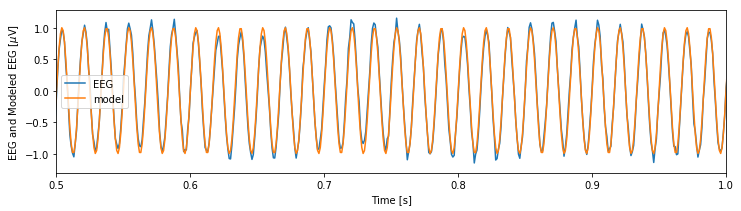

In [12]:
EEG_60Hz_modeled = model.predict()  # Get the model prediction
plot(t, EEG, t, EEG_60Hz_modeled)  # Plot the data and the model
plt.xlim([0.5, 1])  # ... examine 0.5 s of data,
xlabel('Time [s]')  # ... and label the axes
ylabel('EEG and Modeled EEG [$\mu$V]')
plt.legend(['EEG', 'model'])
show()

The model, which contains only three predictors, appears to do quite a good job at capturing the 60 Hz activity in the EEG data.

<div class="alert alert-block alert-info">
<p>**Q.** The multiple linear regression model (<a href="#eq:3.12" class="thumb">eq.<span><img src="imgs/eq3-12.png"></span></a>) is not a *perfect* fit ot the data. Why?</p>

<p>**A.** The multiple linear regression model includes only three predictors. We expect the EEG data to consist of other features, including rhythms at other frequencies. Therefore, this simple model cannot account for all features of the EEG time series. That’s okay. The goal of this model was to fit a particular rhythm, the 60 Hz activity, not every aspect of the data.</p>
</div>

Now, let's examine a powerful application of the model. We've constructed the model to fit the 60 Hz line noise in the EEG data. Let's now use the model to *remove* the 60 Hz line noise from the original EEG data. To do so, we subtract the model fit from the EEG data and then plot the resulting new signal: <a id="fig:3.9"></a>

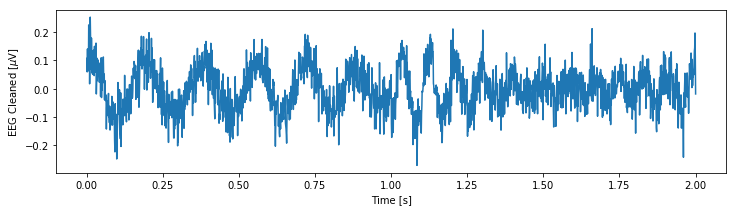

In [13]:
# Remove the model prediction from the EEG data
EEG_cleaned = EEG - EEG_60Hz_modeled
plot(t, EEG_cleaned)  # ... and plot the result
xlabel('Time [s]')
ylabel('EEG Cleaned [$\mu$V]')
show()

<div class="alert alert-block alert-info">
**Q.** Consider the cleaned EEG data. What activity do you now notice? Compare the EEG data in this plot to the original EEG data (<a href="#fig:3-1" class="fig">figure<span><img src="imgs/3-1.png"></span></a>), which includes the 60 Hz noise. What’s different?
</div>

In this example, we used multiple linear regression to model a particular rhythmic component of the EEG data, the 60 Hz activity. We may also use the model result to estimate the power at 60 Hz. In Python,

In [14]:
Sxx_model_60Hz = model.params['sin'] ** 2 + \
                 model.params['cos'] ** 2
Sxx_model_60Hz

0.9978524145209717

The power estimate from the model consists of two terms: the squared coefficient of the sine function plus the squared coefficient of the cosine function. Note that the variable `Sxx_model_60Hz` has units of mV$^2$.

<div class="alert alert-block alert-info">
**Q.** Compare the power estimate from the model (the variable `Sxx_model_60Hz`) to the power spectral density at 60 Hz computed using the Fourier transform (<a href="Analysis%20of%20rhythmic%20activity.ipynb#eq:3.9">code</a>). What do you find?
<br><br>
**A.** We note that the units of the power spectral density (variable `Sxx`) are mV$^2/$Hz, while the units of the power estimated in variable `Sxx_model_60Hz` are mV$^2$. To convert the power spectral density to (integrated) spectral power, we must integrate the variable `Sxx` over a frequency range. Here, we choose a 1 Hz interval centered at 60 Hz, which corresponds to a single index of the variable `faxis`; the frequency resolution for these data is 0.5 Hz (see next section). Then the approximate integrated power over this 1 Hz interval is `Sxx(121)=0.9979`, identical to the value in Sxx_model_60Hz, and with the same units.
</div>

This example, in which we focused on the 60 Hz activity in the EEG, illustrates how we may use multiple linear regression to estimate the power. We could extend this procedure to include additional rhythms in the model beyond 60 Hz (e.g., sine and cosine functions at 1 Hz, 2 Hz, 3 Hz, etc.). In doing so, we would add more terms to the multiple linear regression model and have more $\beta$'s to determine from the data. Multiple linear regression provides a way to decompose the EEG data into sine and cosine functions at different frequencies—just as we proposed to do using the Fourier transform—and then compute the power at each frequency. Using either multiple linear regression or the Fourier transform, we aim to decompose the EEG into sine and cosine functions oscillating at different frequencies.

In [15]:
from IPython.core.display import HTML
HTML('../style.css')